In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
import datetime

In [2]:
#load 5Y dividend data downloaded from yahoo finance
pg_dividend = pd.DataFrame(pd.read_csv("F:/Data Science practice/Blog/Beginner's guide Series/Dividend/PG Dividends 5Y Data.csv", index_col = "Date")).reset_index()

pg_dividend

,Date,Dividends
0,14/04/2016,0.670
1,20/07/2016,0.670
2,19/10/2016,0.670
3,18/01/2017,0.670
4,19/04/2017,0.690
5,19/07/2017,0.690
6,19/10/2017,0.690
7,18/01/2018,0.690
8,19/04/2018,0.717
9,19/07/2018,0.717


In [3]:
#testing iloc method
pg_dividend.iloc[0]["Date"]

'14/04/2016'

In [4]:
#load 5Y stock price data downloaded from yahoo finance
pg_df = pd.DataFrame(pd.read_csv("F:/Data Science practice/Blog/Beginner's guide Series/Dividend/PG Stock Price 5Y Data.csv", index_col = "Date")["Adj Close"]).reset_index()

pg_df.head()

,Date,Adj Close
0,04/01/2016,67.055489
1,05/01/2016,67.269371
2,06/01/2016,66.619118
3,07/01/2016,66.037270
4,08/01/2016,65.001976


In [5]:
#set the first row of the pg_price dataframe - normalise it with the dividend dates
pg_price_df = pg_df[pg_df["Date"] == pg_dividend.iloc[0]["Date"]]


pg_price_df


,Date,Adj Close
70,14/04/2016,71.361397


In [6]:
#normalise stock price dates with the dividend dates
for i in range(len(pg_dividend) - 1):
    x = pg_df[pg_df["Date"] == pg_dividend.iloc[i + 1]["Date"]]
    pg_price_df = pg_price_df.append(x)

pg_price_df = pg_price_df.set_index("Date")

pg_price_df



,Adj Close
Date,
14/04/2016,71.361397
20/07/2016,74.823380
19/10/2016,75.595490
18/01/2017,75.651245
19/04/2017,80.422173
19/07/2017,79.922348
19/10/2017,83.474129
18/01/2018,82.815659
19/04/2018,69.466309


In [7]:
#reset index
pg_dividend_df = pg_dividend.set_index("Date")

pg_dividend_df

,Dividends
Date,
14/04/2016,0.670
20/07/2016,0.670
19/10/2016,0.670
18/01/2017,0.670
19/04/2017,0.690
19/07/2017,0.690
19/10/2017,0.690
18/01/2018,0.690
19/04/2018,0.717


In [8]:
#calculating dividend yield
dy_df = pd.DataFrame(pg_dividend_df["Dividends"] / pg_price_df["Adj Close"] * 100)

dy_df.rename( columns={0 :'Dividend Yield'}, inplace=True )

dy_df


,Dividend Yield
Date,
14/04/2016,0.938883
20/07/2016,0.895442
19/10/2016,0.886296
18/01/2017,0.885643
19/04/2017,0.857972
19/07/2017,0.863338
19/10/2017,0.826603
18/01/2018,0.833176
19/04/2018,1.032155


In [9]:
#convert date format from dd/mm/yyyy to mm/yy
x = pd.DataFrame(pd.to_datetime(pg_dividend["Date"]).dt.strftime('%m/%y'))

x

,Date
0,04/16
1,07/16
2,10/16
3,01/17
4,04/17
5,07/17
6,10/17
7,01/18
8,04/18
9,07/18


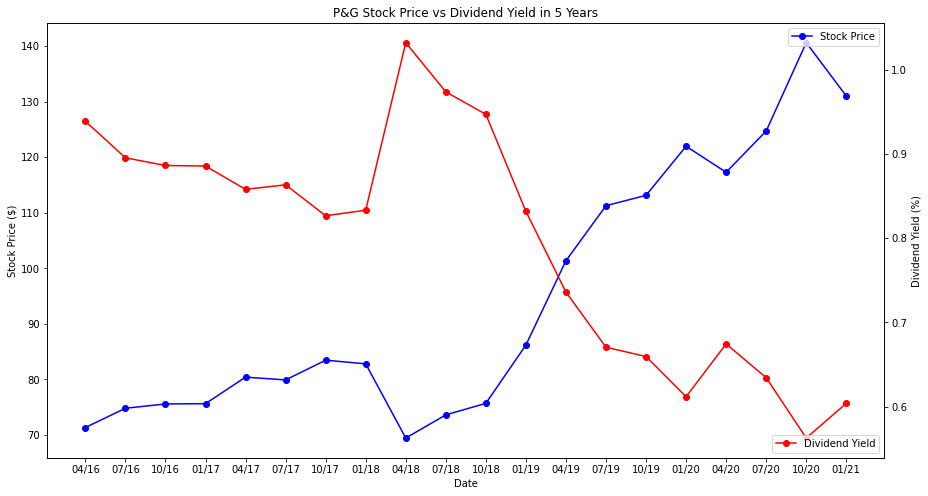

In [12]:
#Plot graph with two different axis
#https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig, ax = plt.subplots(figsize = (15,8))
ax.plot(x["Date"], pg_price_df["Adj Close"], color = "blue", marker = "o", label = "Stock Price")
ax.set_xlabel("Date")
ax.set_ylabel("Stock Price ($)")
ax.legend(loc = "upper right")

ax2 = ax.twinx()
ax2.plot(x["Date"], dy_df["Dividend Yield"], color = "red", marker = "o", label = "Dividend Yield")
ax2.set_ylabel("Dividend Yield (%)")
ax2.legend(loc = "lower right")

plt.title("P&G Stock Price vs Dividend Yield in 5 Years")
plt.show()
fig.savefig("F:/Data Science practice/Blog/Beginner's guide Series/Dividend/Stock Price vs Dividends for P&G.png")